In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combineddata_df = pd.merge(city_data, ride_data, how='left', on='city')

# Display the data table for preview
combineddata_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

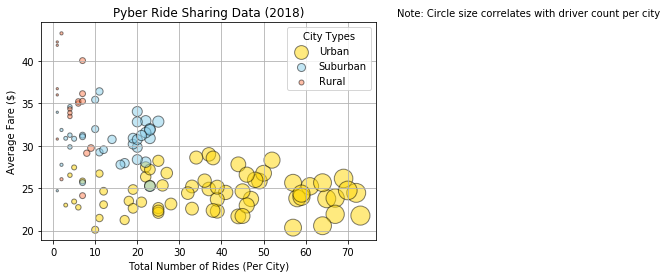

<Figure size 432x288 with 0 Axes>

In [8]:
# Obtain the x and y coordinates for each of the three city types
#create four varibles to find average fare per city, total number of rides per city, total number of drivers per city, city type

urbandata_df= combineddata_df[combineddata_df['type']== "Urban"]
urbanx_axis= urbandata_df.groupby(["city"]).mean()['fare']
urbany_axis = urbandata_df.groupby("city")["driver_count"].mean()

suburbandata_df= combineddata_df[combineddata_df['type']== "Suburban"]
suburbanx_axis= suburbandata_df.groupby(["city"]).mean()['fare']
suburbany_axis = suburbandata_df.groupby("city")["driver_count"].mean()

ruraldata_df= combineddata_df[combineddata_df['type']== "Rural"]
ruralx_axis= ruraldata_df.groupby(["city"]).mean()['fare']
ruraly_axis = ruraldata_df.groupby("city")["driver_count"].mean()

#suburbandata_df= combineddata_df.loc[combineddata_df['type'] == "suburban", :]
#ruraldata_df= combineddata_df.loc[combineddata_df['type'] == "rural", :]

# Build the scatter plots for each city types

plt.scatter(urbany_axis, urbanx_axis, s= urbany_axis*5, facecolors = "gold", 
                        edgecolor= "black", alpha= 0.5, marker= "o", label= "Urban") 

plt.scatter(suburbany_axis, suburbanx_axis, s= suburbany_axis*5, facecolors = "SkyBlue", 
                        edgecolor= "black", alpha= 0.5, marker= "o", label= "Suburban") 

plt.scatter(ruraly_axis, ruralx_axis, s= ruraly_axis*5, facecolors = "Coral", 
                        edgecolor= "black", alpha= 0.5, marker= "o", label= "Rural") 

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(.95, .9, "Note: Circle size correlates with driver count per city")

# Create a legend

plt.legend(title= "City Types", loc= "best")
plt.show()
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("./ScatterRideShare.png")

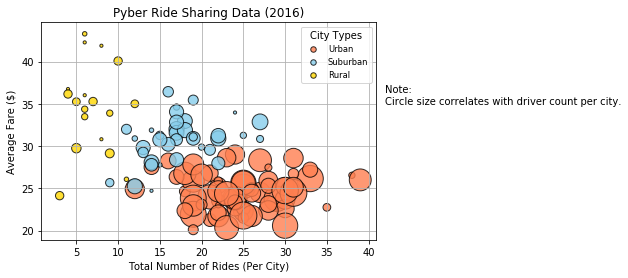

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

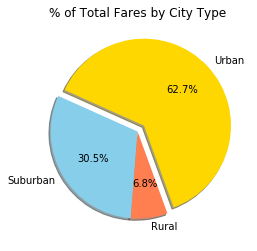

<Figure size 432x288 with 0 Axes>

In [82]:
# Calculate Type Percents
urban_fares = urbandata_df["fare"].sum()
surban_fares = suburbandata_df["fare"].sum()
rural_fares = ruraldata_df["fare"].sum()

# Build Pie Chart
plt.title("% of Total Fares by City Type")

plt.pie((urban_fares, surban_fares, rural_fares), explode = (0.1, 0, 0), labels = ["Urban", "Suburban", "Rural"], 
        colors = ["Gold", "Skyblue", "Coral"], autopct = "%1.1f%%", shadow = True, startangle = 290)


plt.show()
# Save Figure
plt.savefig("./CityRidesPie.png")

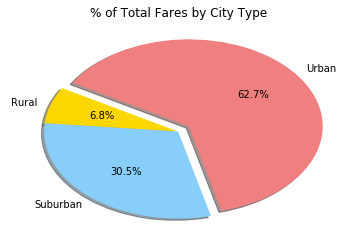

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

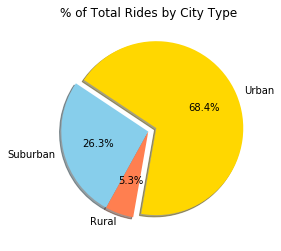

<Figure size 432x288 with 0 Axes>

In [83]:
# Calculate Ride Percents

isolatetypes = combineddata_df["type"].value_counts()

gettingtotal = len(isolatetypes)

isolatetypes_percent = (isolatetypes / gettingtotal)


# Build Pie Chart

plt.title("% of Total Rides by City Type")


plt.pie(isolatetypes, explode = (0.1, 0, 0), labels = ["Urban", "Suburban", "Rural"], colors = ["Gold", "Skyblue", "Coral"], 
autopct = "%1.1f%%", shadow = True, startangle = 260)

plt.show()        
# Save Figure
plt.savefig("./Citytypespie.png")

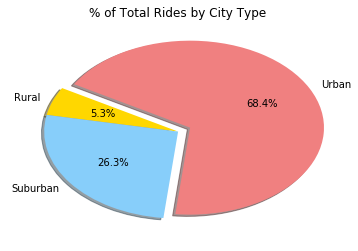

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

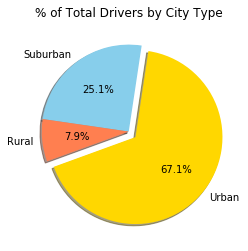

<Figure size 432x288 with 0 Axes>

In [86]:
# Calculate Driver Percents

urban_drivers = urbandata_df["driver_count"].mean()
suburban_drivers = suburbandata_df["driver_count"].mean()
rural_drivers = ruraldata_df["driver_count"].mean()


# Build Pie Charts


plt.title("% of Total Drivers by City Type")

plt.pie((urban_drivers, suburban_drivers, rural_drivers), explode = (0.1, 0, 0), 
        labels = ["Urban", "Suburban", "Rural"], colors = ["Gold", "Skyblue", "Coral"], 
        autopct = "%1.1f%%", shadow = True, startangle = 200)

plt.show()
# Save Figure
plt.savefig("./Citydriverspie.png")

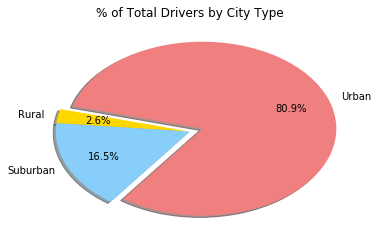

In [6]:
# Show Figure
plt.show()

In [ ]:
# three observeable trends for the data analysis


# 1. From the given data, the most concentration of drivers, fares and prices are in the urban type. With more drivers 
# and people to take rides, the amount of data available makes sense. Rural had the least number of drivers and highest 
# average fair price. Without any expressed information on distance traveled, it is safe to assume that someone living 
# in a rural location must travel further distances in order to get amenities. 

# 2. Suburban drivers accounted for nearly a third of the market fares. The correlation between between number of drivers and 
# fare market activity suggests that passengers are paying more for their trips. Although they may not be as frequent as urban
# drivers, the market is there for the passengers wishing to utilize these ride share copanies. Uber and Lyft should look at
# expanding into these areas as the fare price per driver is higher than in urban areas. 

# 3. Rural drivers accounted for the smallest marketshare of drivers. These few drivers may correspond to the smaller population
# utilizing the services in less populated areas. Uber and Lyft should look into the times of days people who are utilizing 
# the service are doing to see if there are any trends they can capitalize on. 